<h3 style='color:blue' align='center'>Handling imbalanced data in customer churn prediction</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2136,1379-FRVEB,Male,0,No,Yes,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.00,1430.05,No
4649,5172-RKOCB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.95,7875,No
3846,1767-TGTKO,Female,0,Yes,Yes,8,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.45,411.75,No
770,7706-DZNKK,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,237.3,No
4155,6904-JLBGY,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.35,8436.25,No


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

**First of all, drop customerID column as it is of no use**

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

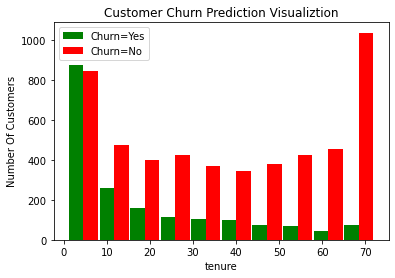

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

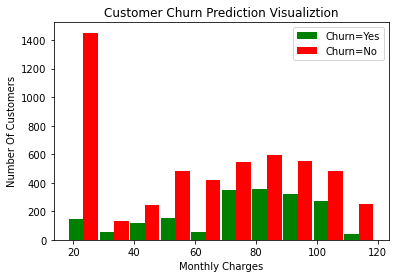

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4252,1,0,0,0,19,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
6001,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
6993,1,1,1,0,50,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1207,1,0,0,1,9,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [34]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
5163/1869

2.7624398073836276

In [38]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [42]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [43]:
# from tensorflow_addons import losses

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 981us/step - loss: 0.5400 - accuracy: 0.7473
Epoch 2/100
176/176 [==============================] - 0s 625us/step - loss: 0.4355 - accuracy: 0.7890
Epoch 3/100
176/176 [==============================] - 0s 600us/step - loss: 0.4291 - accuracy: 0.7930
Epoch 4/100
176/176 [==============================] - 0s 650us/step - loss: 0.4136 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 0s 623us/step - loss: 0.4087 - accuracy: 0.8083
Epoch 6/100
176/176 [==============================] - 0s 568us/step - loss: 0.4003 - accuracy: 0.8128
Epoch 7/100
176/176 [==============================] - 0s 573us/step - loss: 0.4175 - accuracy: 0.7981
Epoch 8/100
176/176 [==============================] - 0s 590us/step - loss: 0.4100 - accuracy: 0.8035
Epoch 9/100
176/176 [==============================] - 0s 566us/step - loss: 0.4016 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 571us/step - l

176/176 [==============================] - 0s 655us/step - loss: 0.3678 - accuracy: 0.8280
Epoch 80/100
176/176 [==============================] - 0s 611us/step - loss: 0.3629 - accuracy: 0.8313
Epoch 81/100
176/176 [==============================] - 0s 586us/step - loss: 0.3749 - accuracy: 0.8186
Epoch 82/100
176/176 [==============================] - 0s 585us/step - loss: 0.3753 - accuracy: 0.8198
Epoch 83/100
176/176 [==============================] - 0s 584us/step - loss: 0.3560 - accuracy: 0.8343
Epoch 84/100
176/176 [==============================] - 0s 599us/step - loss: 0.3570 - accuracy: 0.8413
Epoch 85/100
176/176 [==============================] - 0s 584us/step - loss: 0.3565 - accuracy: 0.8335
Epoch 86/100
176/176 [==============================] - 0s 562us/step - loss: 0.3589 - accuracy: 0.8311
Epoch 87/100
176/176 [==============================] - 0s 556us/step - loss: 0.3637 - accuracy: 0.8310
Epoch 88/100
176/176 [==============================] - 0s 565us/step - loss:

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [47]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [48]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [49]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 650us/step - loss: 0.7092 - accuracy: 0.5430
Epoch 2/100
94/94 [==============================] - 0s 643us/step - loss: 0.5470 - accuracy: 0.7377
Epoch 3/100
94/94 [==============================] - 0s 687us/step - loss: 0.5120 - accuracy: 0.7584
Epoch 4/100
94/94 [==============================] - 0s 652us/step - loss: 0.4953 - accuracy: 0.7614
Epoch 5/100
94/94 [==============================] - 0s 652us/step - loss: 0.5069 - accuracy: 0.7570
Epoch 6/100
94/94 [==============================] - 0s 646us/step - loss: 0.5045 - accuracy: 0.7538
Epoch 7/100
94/94 [==============================] - 0s 657us/step - loss: 0.4925 - accuracy: 0.7571
Epoch 8/100
94/94 [==============================] - 0s 655us/step - loss: 0.4929 - accuracy: 0.7620
Epoch 9/100
94/94 [==============================] - 0s 660us/step - loss: 0.4900 - accuracy: 0.7633
Epoch 10/100
94/94 [==============================] - 0s 644us/step - loss: 0.4891 - accura

94/94 [==============================] - 0s 591us/step - loss: 0.4063 - accuracy: 0.8150
Epoch 82/100
94/94 [==============================] - 0s 587us/step - loss: 0.3953 - accuracy: 0.8180
Epoch 83/100
94/94 [==============================] - 0s 586us/step - loss: 0.3944 - accuracy: 0.8229
Epoch 84/100
94/94 [==============================] - 0s 590us/step - loss: 0.4075 - accuracy: 0.8102
Epoch 85/100
94/94 [==============================] - 0s 587us/step - loss: 0.4037 - accuracy: 0.8147
Epoch 86/100
94/94 [==============================] - 0s 592us/step - loss: 0.3967 - accuracy: 0.8075
Epoch 87/100
94/94 [==============================] - 0s 597us/step - loss: 0.3974 - accuracy: 0.8085
Epoch 88/100
94/94 [==============================] - 0s 585us/step - loss: 0.4095 - accuracy: 0.8019
Epoch 89/100
94/94 [==============================] - 0s 591us/step - loss: 0.4151 - accuracy: 0.8091
Epoch 90/100
94/94 [==============================] - 0s 596us/step - loss: 0.3864 - accuracy: 

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

In [109]:
len(y_test)

2066

### Method2: Oversampling

In [81]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [86]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [87]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [89]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 604us/step - loss: 0.6062 - accuracy: 0.6636
Epoch 2/100
259/259 [==============================] - 0s 610us/step - loss: 0.4968 - accuracy: 0.7603
Epoch 3/100
259/259 [==============================] - 0s 594us/step - loss: 0.4797 - accuracy: 0.7686
Epoch 4/100
259/259 [==============================] - 0s 593us/step - loss: 0.4785 - accuracy: 0.7694
Epoch 5/100
259/259 [==============================] - 0s 600us/step - loss: 0.4743 - accuracy: 0.7754
Epoch 6/100
259/259 [==============================] - 0s 618us/step - loss: 0.4759 - accuracy: 0.7721
Epoch 7/100
259/259 [==============================] - 0s 642us/step - loss: 0.4628 - accuracy: 0.7790
Epoch 8/100
259/259 [==============================] - 0s 579us/step - loss: 0.4708 - accuracy: 0.7862
Epoch 9/100
259/259 [==============================] - 0s 572us/step - loss: 0.4674 - accuracy: 0.7809
Epoch 10/100
259/259 [==============================] - 0s 572us/step - l

259/259 [==============================] - 0s 572us/step - loss: 0.3659 - accuracy: 0.8313
Epoch 80/100
259/259 [==============================] - 0s 573us/step - loss: 0.3592 - accuracy: 0.8395
Epoch 81/100
259/259 [==============================] - 0s 563us/step - loss: 0.3580 - accuracy: 0.8435
Epoch 82/100
259/259 [==============================] - 0s 558us/step - loss: 0.3578 - accuracy: 0.8459
Epoch 83/100
259/259 [==============================] - 0s 561us/step - loss: 0.3650 - accuracy: 0.8417
Epoch 84/100
259/259 [==============================] - 0s 558us/step - loss: 0.3550 - accuracy: 0.8439
Epoch 85/100
259/259 [==============================] - 0s 645us/step - loss: 0.3587 - accuracy: 0.8409
Epoch 86/100
259/259 [==============================] - 0s 626us/step - loss: 0.3662 - accuracy: 0.8297
Epoch 87/100
259/259 [==============================] - 0s 590us/step - loss: 0.3625 - accuracy: 0.8372
Epoch 88/100
259/259 [==============================] - 0s 576us/step - loss:

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [56]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [64]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 605us/step - loss: 0.6168 - accuracy: 0.6526
Epoch 2/100
259/259 [==============================] - 0s 598us/step - loss: 0.4712 - accuracy: 0.7765
Epoch 3/100
259/259 [==============================] - 0s 594us/step - loss: 0.4634 - accuracy: 0.7788
Epoch 4/100
259/259 [==============================] - 0s 566us/step - loss: 0.4657 - accuracy: 0.7787
Epoch 5/100
259/259 [==============================] - 0s 583us/step - loss: 0.4541 - accuracy: 0.7860
Epoch 6/100
259/259 [==============================] - 0s 564us/step - loss: 0.4455 - accuracy: 0.7912
Epoch 7/100
259/259 [==============================] - 0s 564us/step - loss: 0.4571 - accuracy: 0.7848
Epoch 8/100
259/259 [==============================] - 0s 568us/step - loss: 0.4470 - accuracy: 0.7864
Epoch 9/100
259/259 [==============================] - 0s 600us/step - loss: 0.4514 - accuracy: 0.7928
Epoch 10/100
259/259 [==============================] - 0s 581us/step - l

259/259 [==============================] - 0s 576us/step - loss: 0.3397 - accuracy: 0.8505
Epoch 80/100
259/259 [==============================] - 0s 637us/step - loss: 0.3494 - accuracy: 0.8484
Epoch 81/100
259/259 [==============================] - 0s 581us/step - loss: 0.3373 - accuracy: 0.8489
Epoch 82/100
259/259 [==============================] - 0s 635us/step - loss: 0.3530 - accuracy: 0.8439
Epoch 83/100
259/259 [==============================] - 0s 574us/step - loss: 0.3275 - accuracy: 0.8525
Epoch 84/100
259/259 [==============================] - 0s 624us/step - loss: 0.3409 - accuracy: 0.8513
Epoch 85/100
259/259 [==============================] - 0s 573us/step - loss: 0.3430 - accuracy: 0.8472
Epoch 86/100
259/259 [==============================] - 0s 629us/step - loss: 0.3467 - accuracy: 0.8494
Epoch 87/100
259/259 [==============================] - 0s 569us/step - loss: 0.3443 - accuracy: 0.8504
Epoch 88/100
259/259 [==============================] - 0s 634us/step - loss:

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [127]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [128]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [130]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [131]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [132]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [133]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [134]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [135]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 679us/step - loss: 0.6433 - accuracy: 0.6581
Epoch 2/100
94/94 [==============================] - 0s 598us/step - loss: 0.5366 - accuracy: 0.7306
Epoch 3/100
94/94 [==============================] - 0s 619us/step - loss: 0.4999 - accuracy: 0.7611
Epoch 4/100
94/94 [==============================] - 0s 634us/step - loss: 0.4821 - accuracy: 0.7683
Epoch 5/100
94/94 [==============================] - 0s 604us/step - loss: 0.4773 - accuracy: 0.7787
Epoch 6/100
94/94 [==============================] - 0s 656us/step - loss: 0.4814 - accuracy: 0.7759
Epoch 7/100
94/94 [==============================] - 0s 604us/step - loss: 0.4732 - accuracy: 0.7756
Epoch 8/100
94/94 [==============================] - 0s 597us/step - loss: 0.4804 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 598us/step - loss: 0.4813 - accuracy: 0.7613
Epoch 10/100
94/94 [==============================] - 0s 604us/step - loss: 0.4729 - accura

94/94 [==============================] - 0s 572us/step - loss: 0.3915 - accuracy: 0.8122
Epoch 82/100
94/94 [==============================] - 0s 577us/step - loss: 0.3828 - accuracy: 0.8165
Epoch 83/100
94/94 [==============================] - 0s 572us/step - loss: 0.3990 - accuracy: 0.8184
Epoch 84/100
94/94 [==============================] - 0s 563us/step - loss: 0.3907 - accuracy: 0.8198
Epoch 85/100
94/94 [==============================] - 0s 561us/step - loss: 0.3703 - accuracy: 0.8406
Epoch 86/100
94/94 [==============================] - 0s 577us/step - loss: 0.3885 - accuracy: 0.8251
Epoch 87/100
94/94 [==============================] - 0s 562us/step - loss: 0.3833 - accuracy: 0.8318
Epoch 88/100
94/94 [==============================] - 0s 570us/step - loss: 0.3886 - accuracy: 0.8223
Epoch 89/100
94/94 [==============================] - 0s 569us/step - loss: 0.3928 - accuracy: 0.8168
Epoch 90/100
94/94 [==============================] - 0s 561us/step - loss: 0.3789 - accuracy: 

In [136]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 661us/step - loss: 0.6921 - accuracy: 0.5758
Epoch 2/100
94/94 [==============================] - 0s 643us/step - loss: 0.5509 - accuracy: 0.7446
Epoch 3/100
94/94 [==============================] - 0s 681us/step - loss: 0.4944 - accuracy: 0.7586
Epoch 4/100
94/94 [==============================] - 0s 592us/step - loss: 0.4931 - accuracy: 0.7571
Epoch 5/100
94/94 [==============================] - 0s 603us/step - loss: 0.4919 - accuracy: 0.7611
Epoch 6/100
94/94 [==============================] - 0s 596us/step - loss: 0.4767 - accuracy: 0.7710
Epoch 7/100
94/94 [==============================] - 0s 577us/step - loss: 0.4877 - accuracy: 0.7613
Epoch 8/100
94/94 [==============================] - 0s 595us/step - loss: 0.4611 - accuracy: 0.7826
Epoch 9/100
94/94 [==============================] - 0s 630us/step - loss: 0.4746 - accuracy: 0.7691
Epoch 10/100
94/94 [==============================] - 0s 627us/step - loss: 0.4914 - accura

94/94 [==============================] - 0s 617us/step - loss: 0.3931 - accuracy: 0.8195
Epoch 82/100
94/94 [==============================] - 0s 585us/step - loss: 0.3817 - accuracy: 0.8246
Epoch 83/100
94/94 [==============================] - 0s 576us/step - loss: 0.3849 - accuracy: 0.8202
Epoch 84/100
94/94 [==============================] - 0s 564us/step - loss: 0.3841 - accuracy: 0.8119
Epoch 85/100
94/94 [==============================] - 0s 575us/step - loss: 0.3991 - accuracy: 0.8168
Epoch 86/100
94/94 [==============================] - 0s 579us/step - loss: 0.3850 - accuracy: 0.8174
Epoch 87/100
94/94 [==============================] - 0s 570us/step - loss: 0.3696 - accuracy: 0.8389
Epoch 88/100
94/94 [==============================] - 0s 574us/step - loss: 0.3796 - accuracy: 0.8221
Epoch 89/100
94/94 [==============================] - 0s 613us/step - loss: 0.3784 - accuracy: 0.8243
Epoch 90/100
94/94 [==============================] - 0s 568us/step - loss: 0.3899 - accuracy: 

In [137]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 609us/step - loss: 0.6812 - accuracy: 0.5340
Epoch 2/100
83/83 [==============================] - 0s 579us/step - loss: 0.5479 - accuracy: 0.7725
Epoch 3/100
83/83 [==============================] - 0s 570us/step - loss: 0.5112 - accuracy: 0.7521
Epoch 4/100
83/83 [==============================] - 0s 777us/step - loss: 0.4736 - accuracy: 0.7673
Epoch 5/100
83/83 [==============================] - 0s 685us/step - loss: 0.4747 - accuracy: 0.7747
Epoch 6/100
83/83 [==============================] - 0s 637us/step - loss: 0.4647 - accuracy: 0.7832
Epoch 7/100
83/83 [==============================] - 0s 581us/step - loss: 0.4761 - accuracy: 0.7768
Epoch 8/100
83/83 [==============================] - 0s 569us/step - loss: 0.4623 - accuracy: 0.7851
Epoch 9/100
83/83 [==============================] - 0s 576us/step - loss: 0.4609 - accuracy: 0.7886
Epoch 10/100
83/83 [==============================] - 0s 573us/step - loss: 0.4604 - accura

83/83 [==============================] - 0s 589us/step - loss: 0.3769 - accuracy: 0.8293
Epoch 82/100
83/83 [==============================] - 0s 605us/step - loss: 0.3496 - accuracy: 0.8511
Epoch 83/100
83/83 [==============================] - 0s 666us/step - loss: 0.3531 - accuracy: 0.8498
Epoch 84/100
83/83 [==============================] - 0s 687us/step - loss: 0.3542 - accuracy: 0.8443
Epoch 85/100
83/83 [==============================] - 0s 653us/step - loss: 0.3701 - accuracy: 0.8378
Epoch 86/100
83/83 [==============================] - 0s 598us/step - loss: 0.3710 - accuracy: 0.8332
Epoch 87/100
83/83 [==============================] - 0s 590us/step - loss: 0.3614 - accuracy: 0.8405
Epoch 88/100
83/83 [==============================] - 0s 590us/step - loss: 0.3840 - accuracy: 0.8240
Epoch 89/100
83/83 [==============================] - 0s 573us/step - loss: 0.3392 - accuracy: 0.8559
Epoch 90/100
83/83 [==============================] - 0s 581us/step - loss: 0.3699 - accuracy: 

In [141]:
len(y_pred3)

1407

In [144]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [145]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.71      0.73      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes

In [146]:
# Same as above
y_pred_final = []
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [150]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.71      0.73      1407

